In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Le clustering

In [2]:
from sklearn.cluster import KMeans

In [3]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=2, random_state=92500)
plt.scatter(X[:,0], X[:,1])

-759.0768415709761

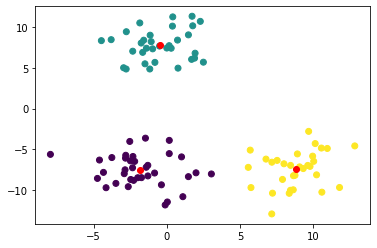

In [4]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X) # Opposite of the value of X on the K-means objective.

On était parti sur à l'oeil 3 groupes, mais quel aurait été le meilleur nombre de clusters

Voyons la méthode du coude (*Elbow Method*)

(éventuellement utiliser une valeur plus grande, telle que 4, pour la grandeur `cluster_std` ci-dessus)

In [5]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

Text(0, 0.5, 'Cout du modele (Inertia)')

## La détection d'anomalie

In [6]:
from sklearn.ensemble import IsolationForest

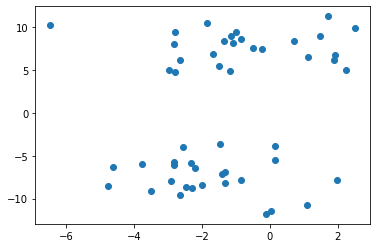

In [7]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=2, random_state=92500)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

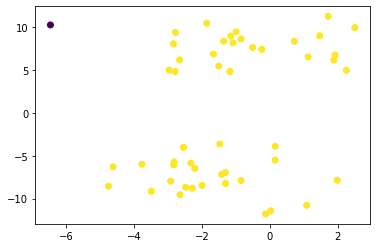

In [8]:
model = IsolationForest(contamination=0.01)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

### Application *impressionnantes*

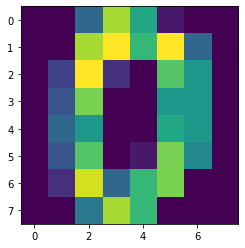

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

plt.imshow(images[0])

In [10]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
outliers = model.predict(X) == -1
outlier_count = np.sum(outliers)

#outliers = 36


<Figure size 720x720 with 0 Axes>

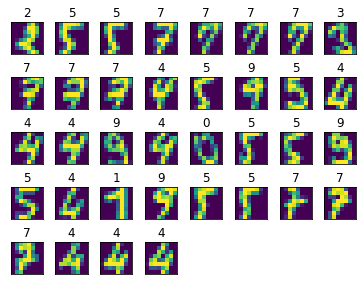

In [12]:
plt.figure(figsize=(10, 10))
print(f"#outliers = {outlier_count}")
line_size = 8
line_count = outlier_count//line_size + (outlier_count%line_size != 0)
fig, axs = plt.subplots(line_count, line_size)
for i in range(line_size*line_count):
  ax = axs[i//line_size, i%line_size]
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_visible(False)

for i in range(outlier_count):
  ax = axs[i//line_size, i%line_size]
  ax.imshow(images[outliers][i])
  ax.set_visible(True)
  ax.set_title(y[outliers][i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

## Réduction de dimension

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### Application à la visualisation 2D

In [13]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

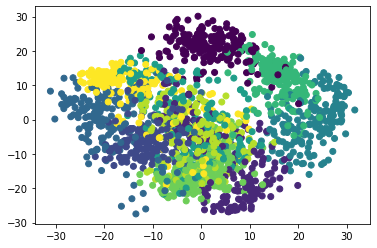

In [14]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

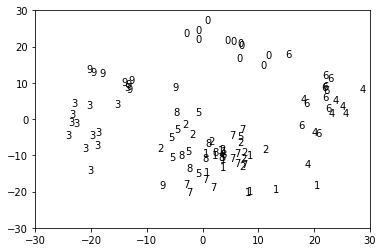

In [15]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

### Application à la compression de données

In [16]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

best_dims = np.argmax(np.cumsum(variances) > 0.90)

plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, best_dims, colors='r')
plt.vlines(best_dims, 0, 0.90, colors='r')

In [17]:
model = PCA(n_components=0.95) # cf doc: select the number of components such that the amount of variance 
                               # that needs to be explained is greater than the percentage specified 
                               # by n_components
model.fit(X)

PCA(n_components=0.95)

In [18]:
X_compressed = model.fit_transform(X)
X_decompressed = model.inverse_transform(X_compressed)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(X_decompressed[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')

Text(0.5, 1.0, 'Compressé')